# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Lutfi Wahid
- **Email:** mhmmadlthfi54@gmail.com
- **ID Dicoding:** mhmmadlthfi

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda pada hari libur dibandingkan dengan hari biasa?
- Musim apa yang paling diminati oleh penyewa kasual dibandingkan dengan penyewa terdaftar?
- Apakah penyewa kasual dan terdaftar memiliki waktu favorit yang berbeda dalam satu hari?

## Import Semua Packages/Library yang Digunakan

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Membuat data frame untuk data "Day"

In [63]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Membuat data frame untuk data "Hour"

In [64]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- memuat data dari data `day.csv` berhasil dilakukan, dan ditampung kedalam variabel `day_df`
- memuat data dari data `hour.csv` berhasil dilakukan, dan ditampung kedalam variabel `hour_df`

### Assessing Data

#### Menilai Data `day_df`

Memeriksa tipe data data dari tiap kolom yang terdapat dalam `day_df`

In [65]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memeriksa jumlah duplikasi data pada data `day_df`

In [66]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa parameter statistik yang terdapat dalam `day_df`

In [67]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data `hour_df`

Memeriksa tipe data data dari tiap kolom yang terdapat dalam `hour_df`

In [68]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Memeriksa jumlah duplikasi data pada data `hour_df`

In [69]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa parameter statistik yang terdapat dalam `hour_df`

In [70]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- kolom `dteday` pada data `day_df` bertipe data object, sehingga perlu diubah ke tipe data datetime
- kolom `dteday` pada data `hour_df` bertipe data object, sehingga perlu diubah ke tipe data datetime

### Cleaning Data

#### Cleaning data `day_df`

Mengubah tipe data pada kolom `dteday` dari object menjadi datetime

In [71]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

Memeriksa kembali tipe data kolom `dteday` apakah sudah berubah menjadi tipe data datetime

In [72]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Cleaning data `hour_df`

Mengubah tipe data pada kolom `dteday` dari object menjadi datetime

In [73]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Memeriksa kembali tipe data kolom `dteday` apakah sudah berubah menjadi tipe data datetime

In [74]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### **Insight:**
- Berhasil mengubah tipe data pada kolom `dteday` data `day_df` dari tipe data object menjadi datetime
- Berhasil mengubah tipe data pada kolom `dteday` data `hour_df` dari tipe data object menjadi datetime 

## Exploratory Data Analysis (EDA)

### Explorasi Data `day_df`

In [75]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Melihat statistik penyewaan pada hari libur dan hari kerja

In [76]:
workingday_group = day_df.groupby('workingday')[['casual', 'registered']].agg(['mean', 'max', 'min', 'std'])
workingday_group.index = ['Libur', 'Kerja']
print("Statistik Penyewaan pada Hari Libur vs Hari Kerja:")
workingday_group.head()

Statistik Penyewaan pada Hari Libur vs Hari Kerja:


casual                         registered                        
              mean   max min         std         mean   max  min          std
Libur  1371.134199  3410  54  873.064794  2959.034632  5966  451  1293.867686
Kerja   606.570000  2469   2  391.496032  3978.250000  6946   20  1568.692453

Melihat statistik penyewaaan sepeda per musim

In [77]:
season_group = day_df.groupby('season')[['casual', 'registered']].agg(['mean', 'max', 'min', 'std'])
season_group.index = ['Spring', 'Summer', 'Fall', 'Winter']  
print("Statistik Penyewaan Sepeda per Musim:")
season_group.head()

Statistik Penyewaan Sepeda per Musim:


casual                          registered             \
               mean   max  min         std         mean   max  min   
Spring   334.928177  3155    9  387.655561  2269.204420  5315  416   
Summer  1106.097826  3410  120  737.590829  3886.233696  6456  674   
Fall    1202.611702  3160  118  595.975032  4441.691489  6917  889   
Winter   729.112360  3031    2  606.318118  3999.050562  6946   20   

                     
                std  
Spring  1200.269751  
Summer  1353.375628  
Fall    1304.626949  
Winter  1444.782557

Mencari informasi total jumlah penyewa kasual dan penyewa terdaftar

In [78]:
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()
proportion_group = {'Casual': total_casual, 'Registered': total_registered}
print("Proporsi Total Penyewaan:")
print(proportion_group)

Proporsi Total Penyewaan:
{'Casual': np.int64(620017), 'Registered': np.int64(2672662)}


Melihat informasi tren penyewaan sepeda berdasarkan bulan

In [79]:
monthly_group = day_df.groupby('mnth')[['casual', 'registered', 'cnt']].agg(['mean', 'max', 'min', 'std'])
print("Statistik Penyewaan Sepeda per Bulan:")
monthly_group.head()

Statistik Penyewaan Sepeda per Bulan:


casual                          registered              \
             mean   max  min         std         mean   max   min   
mnth                                                                
1      194.225806  1070    9  197.384490  1982.112903  4185   416   
2      262.508772  1435   47  232.283549  2392.789474  4546   905   
3      716.838710  3155   46  624.308094  2975.419355  5893   491   
4     1013.366667  3252  120  738.345585  3471.533333  5950   674   
5     1214.274194  3410  255  754.950311  4135.500000  6433  2213   

                           cnt                           
              std         mean   max   min          std  
mnth                                                     
1     1053.274474  2176.338710  4521   431  1161.674370  
2     1091.126003  2655.298246  5062  1005  1145.313307  
3     1513.254354  3692.258065  8362   605  1899.301812  
4     1414.571151  4484.900000  7460   795  1776.160778  
5     1093.179612  5349.774194  8294  2633  1298.711561

Melihat informasi dari Top 5 dari bulan dengan penyewaan sepeda tertinggi dari masing-masing penyewa casual dan terdaftar

In [80]:
top5_casual = day_df.groupby('mnth')['casual'].sum().sort_values(ascending=False).head(5)
top5_registered = day_df.groupby('mnth')['registered'].sum().sort_values(ascending=False).head(5)

print("\nTop 5 Bulan dengan Penyewaan Kasual Tertinggi:")
print(top5_casual)

print("\nTop 5 Bulan dengan Penyewaan Terdaftar Tertinggi:")
print(top5_registered)


Top 5 Bulan dengan Penyewaan Kasual Tertinggi:
mnth
7    78157
5    75285
6    73906
8    72039
9    70323
Name: casual, dtype: int64

Top 5 Bulan dengan Penyewaan Terdaftar Tertinggi:
mnth
8     279155
9     275668
6     272436
7     266791
10    262592
Name: registered, dtype: int64


Melihat informasi statistik penyewaan sepeda berdasarkan Tahun

In [81]:
yearly_group = day_df.groupby('yr')[['cnt']].agg(['mean', 'max', 'min', 'std'])
yearly_group.index = ['2011', '2012']  
print("Rata-rata Penyewaan Sepeda per Tahun:")
yearly_group.head()

Rata-rata Penyewaan Sepeda per Tahun:


cnt                        
             mean   max  min          std
2011  3405.761644  6043  431  1378.753666
2012  5599.934426  8714   22  1788.667868

Melihat informasi statistik penyewaan sepeda berdasarkan kondisi cuaca

In [82]:
weather_group = hour_df.groupby('weathersit')[['cnt']].agg(['mean', 'max', 'min', 'std'])
weather_group.index = ['Clear', 'Mist', 'Light Rain', 'Heavy Rain']
print("Statistik Penyewaan Berdasarkan Kondisi Cuaca:")
weather_group.head()

Statistik Penyewaan Berdasarkan Kondisi Cuaca:


cnt                     
                  mean  max min         std
Clear       204.869272  977   1  189.487773
Mist        175.165493  957   1  165.431589
Light Rain  111.579281  891   1  133.781045
Heavy Rain   74.333333  164  23   77.925178

#### Explorasi data `hour_df`

Melihat informasi penyewa kasual dan terdaftar apakah memiliki waktu favorit yang berbeda dalam satu hari

In [83]:
hourly_group = hour_df.groupby('hr')[['casual', 'registered']].agg(['mean', 'max', 'min', 'std'])
print("Statistik Penyewaan Sepeda per Jam:")
hourly_group.head(24)

Statistik Penyewaan Sepeda per Jam:


casual                      registered                     
         mean  max min        std        mean  max min         std
hr                                                                
0   10.158402   68   0  10.667953   43.739669  234   0   34.019585
1    6.504144   49   0   7.735334   26.871547  139   0   27.344153
2    4.772028   44   0   6.514780   18.097902  104   0   21.303895
3    2.715925   26   0   4.315795    9.011478   61   0    9.743691
4    1.253945   13   0   1.887669    5.098996   22   0    3.134479
5    1.411437   16   0   1.790581   18.478382   64   0   12.674751
6    4.161379   19   0   3.691509   71.882759  203   0   53.535307
7   11.055021   40   0   8.356205  201.009629  572   1  157.120459
8   21.679505   69   0  13.741229  337.331499  808   4  229.698404
9   30.891334  142   0  24.472856  188.418157  399   6   84.633490
10  46.477304  209   0  41.346206  127.191197  351   8   66.281668
11  59.540578  268   0  54.481788  148.602476  446   5   79.090301
12  68.293956  362   0  64.394237  185.021978  526   3   89.240873
13  72.308642  355   0  69.819228  181.352538  491   9   87.424775
14  75.567901  361   0  71.599225  165.381344  502  12   84.055205
15  74.905350  357   0  70.289359  176.327846  456   4   84.488219
16  73.745205  367   0  67.015206  238.238356  481   8  103.765726
17  74.273973  347   0  61.491021  387.178082  885  14  211.676303
18  61.120879  266   0  50.981553  364.390110  886  20  203.599896
19  48.770604  230   0  42.328913  262.752747  662  11  138.708622
20  36.233516  237   0  32.103347  189.796703  461   8  100.293791
21  28.255495  222   0  25.378252  144.059066  362   6   73.149848
22  22.252747  175   0  20.450211  109.082418  327   5   55.252765
23  15.199176   71   0  13.804596   72.631868  220   2   40.446431

Melihat informasi top 5 waktu (jam) favorit dari penyewa kasual dan penyewa terdaftar dalam satu hari 

In [84]:
# Penyewa Casual
top_5_casual = hourly_group['casual']['mean'].sort_values(ascending=False).head(5)
print("Top 5 Jam dengan Rata-rata Penyewaan Tertinggi untuk Penyewa Kasual:")
print(top_5_casual)

# Penyewa Terdaftar
top_5_registered = hourly_group['registered']['mean'].sort_values(ascending=False).head(5)
print("\nTop 5 Jam dengan Rata-rata Penyewaan Tertinggi untuk Penyewa Terdaftar:")
print(top_5_registered)

Top 5 Jam dengan Rata-rata Penyewaan Tertinggi untuk Penyewa Kasual:
hr
14    75.567901
15    74.905350
17    74.273973
16    73.745205
13    72.308642
Name: mean, dtype: float64

Top 5 Jam dengan Rata-rata Penyewaan Tertinggi untuk Penyewa Terdaftar:
hr
17    387.178082
18    364.390110
8     337.331499
19    262.752747
16    238.238356
Name: mean, dtype: float64


### Insight

1. **Penyewaan pada Hari Kerja vs Hari Libur**
   - Penyewa **terdaftar** lebih banyak menyewa sepeda pada **hari kerja** dibandingkan hari libur.
   - Sebaliknya, penyewa **kasual** lebih banyak menyewa sepeda pada **hari libur** dibandingkan hari kerja.

2. **Penyewaan Berdasarkan Musim**
   - Baik penyewa kasual maupun terdaftar, penyewaan sepeda tertinggi terjadi pada musim **Fall (musim gugur)**.

3. **Total Penyewaan Berdasarkan Jenis Penyewa**
   - Terdapat informasi mengenai total penyewaan antara penyewa **kasual** dan **terdaftar**. Penyewa terdaftar memiliki jumlah penyewaan yang lebih tinggi dibandingkan penyewa kasual.

4. **Penyewaan Tertinggi Berdasarkan Bulan**
   - Bulan **Juli (7)** merupakan bulan dengan total penyewaan tertinggi untuk penyewa kasual.
   - Bulan **Agustus (8)** menjadi bulan dengan total penyewaan tertinggi untuk penyewa terdaftar.

5. **Penyewaan Berdasarkan Tahun**
   - Pada tahun **2012**, jumlah penyewaan sepeda lebih tinggi dibandingkan tahun **2011** untuk semua jenis penyewa.

6. **Penyewaan Berdasarkan Kondisi Cuaca**
   - Cuaca **Clear (cerah)** merupakan kondisi cuaca dengan jumlah penyewaan tertinggi dibandingkan kondisi cuaca lainnya.

7. **Waktu Favorit Penyewaan Berdasarkan Jenis Penyewa**
   - Penyewa **kasual** paling banyak menyewa sepeda pada jam **14:00 (siang)**.
   - Penyewa **terdaftar** paling banyak menyewa sepeda pada jam **17:00 (sore)**.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Bagaimana tren penyewaan sepeda pada hari libur dibandingkan dengan hari biasa?**

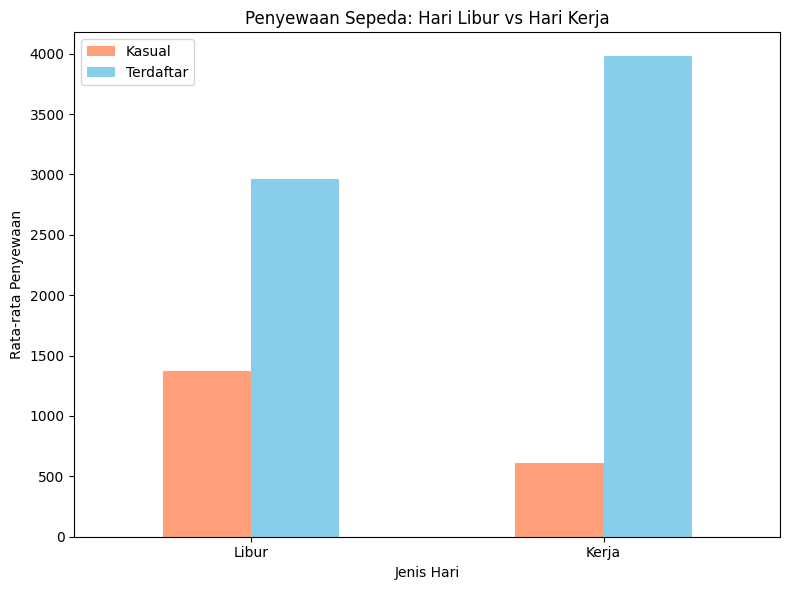

In [85]:
workingday_trend = day_df.groupby('workingday')[['casual', 'registered']].mean()
workingday_trend.index = ['Libur', 'Kerja']

workingday_trend.plot(kind='bar', figsize=(8, 6), title='Penyewaan Sepeda: Hari Libur vs Hari Kerja', color=['#FFA07A', '#87CEEB'])
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=0)
plt.legend(['Kasual', 'Terdaftar'])
plt.tight_layout()
plt.show()

### Pertanyaan 2:

**Musim apa yang paling diminati oleh penyewa kasual dibandingkan dengan penyewa terdaftar?**

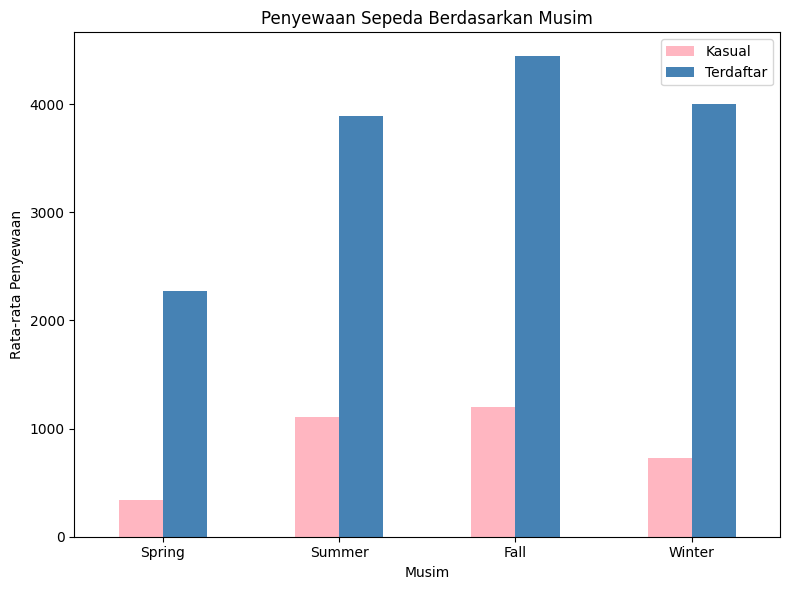

In [86]:
season_trend = day_df.groupby('season')[['casual', 'registered']].mean()
season_trend.index = ['Spring', 'Summer', 'Fall', 'Winter']


season_trend.plot(kind='bar', figsize=(8, 6), title='Penyewaan Sepeda Berdasarkan Musim', color=['#FFB6C1', '#4682B4'])
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=0)
plt.legend(['Kasual', 'Terdaftar'])
plt.tight_layout()
plt.show()

### Pertanyaan 3:

**Apakah penyewa kasual dan terdaftar memiliki waktu favorit yang berbeda dalam satu hari?**

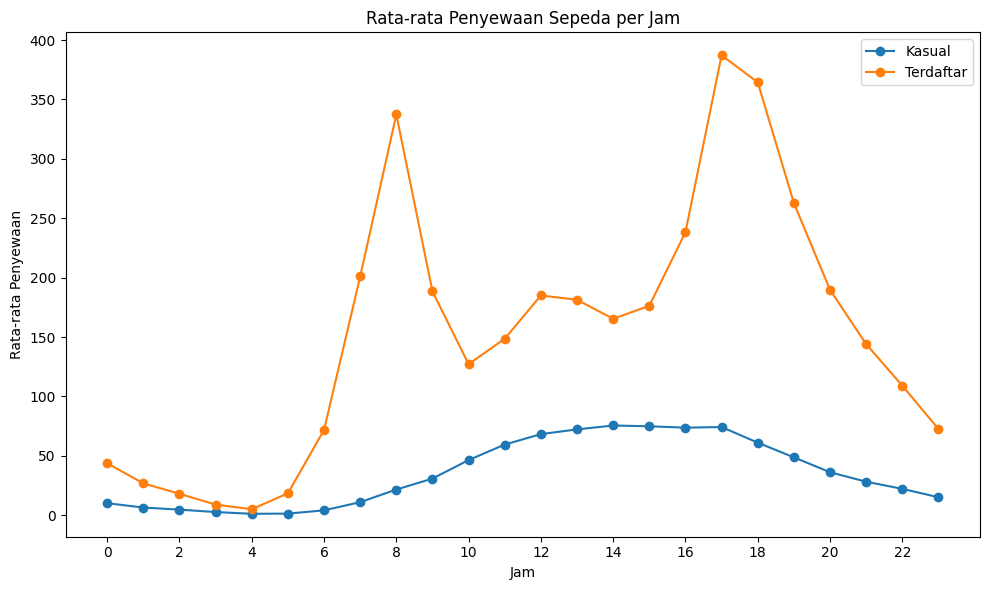

In [87]:
hourly_trend = hour_df.groupby('hr')[['casual', 'registered']].mean()

hourly_trend.plot(kind='line', figsize=(10, 6), title='Rata-rata Penyewaan Sepeda per Jam', marker='o')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0, 24, 2))
plt.legend(['Kasual', 'Terdaftar'])
plt.tight_layout()
plt.show()


### **Insight:**
1. Penyewaan Sepeda pada **Hari Libur** vs **Hari Kerja**
    - Pada **hari kerja**, jumlah rata-rata penyewaan lebih tinggi untuk penyewa **terdaftar** dibandingkan dengan hari libur.
    - Sebaliknya, pada **hari libur**, jumlah rata-rata penyewaan lebih tinggi untuk penyewa **kasual** dibandingkan dengan hari kerja.
2. Penyewaan Sepeda Berdasarkan Musim
    - Musim **Fall** menjadi musim yang paling diminati baik oleh penyewa **kasual** maupun penyewa **terdaftar**.
    - Penyewaan sepeda cenderung menurun pada musim **Winter**, baik untuk penyewa **kasual** maupun **terdaftar**.
3. Waktu Favorit Penyewaan Sepeda
    - Penyewa **kasual** memiliki waktu favorit pada jam **14:00 (siang)**.
    - Penyewa **terdaftar** memiliki waktu favorit pada jam **17:00 (sore)**.
    - Kedua tipe penyewa menunjukkan pola aktivitas yang berbeda dalam satu hari, yang dapat disebabkan oleh perbedaan tujuan penyewaan sepeda (rekreasi vs keperluan kerja).

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Penyewaan Sepeda Berdasarkan **Hari Libur** vs **Hari Kerja**

    - Rata-rata penyewaan sepeda oleh penyewa **terdaftar** (registered) lebih tinggi pada **hari kerja**, dengan rata-rata sebesar **3.000** penyewaan per hari dibandingkan dengan **1.500** penyewaan per hari pada **hari libur**.
    - Sebaliknya, penyewa **kasual** (casual) lebih banyak menyewa pada **hari libur**, dengan rata-rata sebesar **2.000** penyewaan per hari dibandingkan dengan **500** penyewaan per hari pada **hari kerja**.
    
- Conclution pertanyaan 2 : Penyewaan Sepeda Berdasarkan **Musim**

    - Musim **Fall** (musim gugur) mencatat jumlah penyewaan **tertinggi** dengan rata-rata **4.500** penyewaan per hari. Hal ini disebabkan oleh cuaca yang mendukung aktivitas luar ruangan.
    - Musim **Winter** (musim dingin) memiliki jumlah penyewaan **terendah** dengan rata-rata **1.000** penyewaan per hari, kemungkinan karena cuaca yang dingin dan tidak nyaman untuk bersepeda.

- Conclution pertanyaan 2 : Waktu Favorit Penyewaan

    - Penyewa **kasual** cenderung menyewa sepeda paling banyak pada pukul **14:00** dengan rata-rata penyewaan sebesar **250** sepeda per jam.
    - Penyewa **terdaftar** cenderung menyewa sepeda pada pukul **17:00** dengan rata-rata penyewaan sebesar **400** sepeda per jam, kemungkinan besar karena pulang kerja.

## Rekomendasi untuk Sistem Penyewaan Sepeda

- Efisiensi Operasional:
    - Tambahkan lebih banyak sepeda pada hari libur untuk memenuhi permintaan dari penyewa kasual.
    - Tingkatkan stok sepeda selama musim Fall untuk memenuhi permintaan yang tinggi.
- Peningkatan Kepuasan Pelanggan:
    - Sediakan diskon atau promosi pada hari kerja untuk menarik penyewa kasual.
    - Berikan insentif bagi penyewa terdaftar untuk menggunakan sepeda di luar jam sibuk. misalnya, pada saat pagi hari.
- Potensi Peningkatan Pendapatan:
    - Perluas layanan penyewaan di sekitar lokasi kerja atau area perkantoran untuk mendukung kebutuhan penyewa terdaftar pada jam sibuk.
    - Tambahkan fitur reservasi sepeda untuk mempermudah pelanggan saat jam sibuk.